# Задание 3. Исследование алгоритмов классификации

## В качестве исходного датафрема возьмем Ирисы Фишера ))

Датасет включает в себя измерения трех видов ирисов (рода растений) — setosa, versicolor и virginica. Для каждого вида было измерено четыре характеристики:

Длина чашелистика (sepal length): Длина одного из лепестков цветка, который находится ближе к основанию.
Ширина чашелистика (sepal width): Ширина одного из лепестков цветка, который находится ближе к основанию.
Длина лепестка (petal length): Длина другого лепестка цветка, который находится дальше от основания.
Ширина лепестка (petal width): Ширина другого лепестка цветка, который находится дальше от основания.
Все измерения указаны в сантиметрах.

Датасет включает в себя 150 наблюдений (**50 для каждого вида ирисов => сбалансированность классов**), что делает его достаточно небольшим для обучения и тестирования алгоритмов машинного обучения.

**Загрузим датасет и добавим к нему атрибут метки классов (target)**

In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings('ignore')

# Загрузка датасета Iris
iris = load_iris()

# Вывод информации о датасете
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['target'] = iris.target  # Добавление столбца с метками
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**В рамках задачи классификации выберем в качетсве X - измерения длины и ширины лепестков и чашелистиков цветков, а в качестве Y - вид ириса (setosa, versicolor, virginica), который мы пытаемся определить на основе измерений**

52

In [31]:
X = df.drop('target', axis=1)  
Y = df['target'] 




## 1. Необходимо оценить и сравнить результаты классификации, используя следующие

**алгоритмы классификации:**
* kNN
* дерево решений

**Оценим kNN алгоритм:**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, 
                                                      test_size=0.3, 
                                                      random_state=13)
X_train.shape, X_valid.shape

first_knn = KNeighborsClassifier()

np.mean(cross_val_score(first_knn, X_train, Y_train, cv=5))

0.9619047619047618

Результат теста **0.9619047619047618** представляет собой среднюю точность (accuracy) модели k-ближайших соседей (KNN) на кросс-валидации. Точность - это метрика, измеряющая долю правильных предсказаний модели относительно общего числа наблюдений.

Точность **0.9619047619047618** означает, что в среднем модель правильно классифицировала около **96.19%** наблюдений во время кросс-валидации. Высокая точность свидетельствует о том, что модель KNN с текущими параметрами (по умолчанию) довольно хорошо справляется с задачей классификации на обучающих данных.

**Оценим оставшийся алгоритм:**

In [33]:
from sklearn.tree import DecisionTreeClassifier

first_tree = DecisionTreeClassifier(random_state=13)

np.mean(cross_val_score(first_tree, X_train, Y_train, cv=5))

0.9428571428571428

Это значение указывает на то, что модель решающего дерева (Decision Tree) с параметрами по умолчанию достигла в среднем точности в районе **94.29%** на обучающих данных при использовании кросс-валидации.

**Настроим максимальную глубину дерева, чтобы улучшить результат точности**

In [34]:
from sklearn.model_selection import GridSearchCV

tree_params = {'max_depth': np.arange(1, 11), 'max_features': [0.5, 0.7, 1]}
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

# Fit the grid search to your data
tree_grid.fit(X_train, Y_train)

# Access the best estimator and its corresponding score
best_tree = tree_grid.best_estimator_
best_score = tree_grid.best_score_

print("Лучшая оценка для дерева решений:", best_score)
print("Лучшие параметры для дерева решений:", tree_grid.best_params_)


Лучшая оценка для дерева решений: 0.9523809523809523
Лучшие параметры для дерева решений: {'max_depth': 3, 'max_features': 0.5}


В нашем случае мы получили что модель с наилучшей комбинацией параметров (максимальная глубина равная 3 и максимальное количество признаков равное 0.5) достигла примерно 95.24% точности на обучающих данных.

In [35]:
knn_params = {'n_neighbors': list(range(5, 30, 5)) + list(range(50, 100, 10))}

knn_grid = GridSearchCV(first_knn, knn_params, cv=5)

# Обучение модели с использованием метода fit
knn_grid.fit(X_train, Y_train)

# Получение лучшей оценки и лучших параметров
best_knn_score = knn_grid.best_score_
best_knn_params = knn_grid.best_params_

print("Лучшая оценка для KNN:", best_knn_score)
print("Лучшие параметры для KNN:", best_knn_params)


Лучшая оценка для KNN: 0.9619047619047618
Лучшие параметры для KNN: {'n_neighbors': 5}


**В данном случае модель k-ближайших соседей (KNN) с наилучшим параметром (k=5) продемонстрировала немного более высокую точность (0.9619) по сравнению с моделью решающего дерева (0.9524) на обучающих данных.**

## 2. Сравните полученные результаты с помощью различных метрик оценки качества:
* Accuracy
* Presicion, Recall, F-measure
* ROC

### Accuracy:

In [36]:
from sklearn.metrics import accuracy_score

# Прогнозы для модели k-ближайших соседей на валидационных данных
knn_valid_pred = knn_grid.predict(X_valid)

# Прогнозы для модели решающего дерева на валидационных данных
tree_valid_pred = tree_grid.predict(X_valid)

# Точность для модели k-ближайших соседей на валидационных данных
knn_accuracy = accuracy_score(Y_valid, knn_valid_pred)

# Точность для модели решающего дерева на валидационных данных
tree_accuracy = accuracy_score(Y_valid, tree_valid_pred)

print("Точность KNN на валидационных данных:", knn_accuracy)
print("Точность решающего дерева на валидационных данных:", tree_accuracy)


Точность KNN на валидационных данных: 0.9111111111111111
Точность решающего дерева на валидационных данных: 0.8666666666666667


### Presicion:

In [37]:
from sklearn.metrics import precision_score

# Точность для модели решающего дерева на валидационных данных
tree_precision = precision_score(Y_valid, tree_valid_pred, average='weighted')

# Точность для модели k-ближайших соседей на валидационных данных
knn_precision = precision_score(Y_valid, knn_valid_pred, average='weighted')

print("Точность (precision) решающего дерева на валидационных данных:", tree_precision)
print("Точность (precision) KNN на валидационных данных:", knn_precision)


Точность (precision) решающего дерева на валидационных данных: 0.9111111111111111
Точность (precision) KNN на валидационных данных: 0.9333333333333333


### Recall:

In [38]:
from sklearn.metrics import recall_score

# Полнота для модели решающего дерева на валидационных данных
tree_recall = recall_score(Y_valid, tree_valid_pred, average='weighted')

# Полнота для модели k-ближайших соседей на валидационных данных
knn_recall = recall_score(Y_valid, knn_valid_pred, average='weighted')

print("Полнота (recall) решающего дерева на валидационных данных:", tree_recall)
print("Полнота (recall) KNN на валидационных данных:", knn_recall)


Полнота (recall) решающего дерева на валидационных данных: 0.8666666666666667
Полнота (recall) KNN на валидационных данных: 0.9111111111111111


### F-measure:

In [39]:
from sklearn.metrics import f1_score

# Вычисление F1-меры для модели решающего дерева на валидационных данных
tree_f1 = f1_score(Y_valid, tree_valid_pred, average='weighted')

# Вычисление F1-меры для модели k-ближайших соседей на валидационных данных
knn_f1 = f1_score(Y_valid, knn_valid_pred, average='weighted')

print("F1-мера для решающего дерева на валидационных данных:", tree_f1)
print("F1-мера для KNN на валидационных данных:", knn_f1)


F1-мера для решающего дерева на валидационных данных: 0.8675
F1-мера для KNN на валидационных данных: 0.9122315592903828


**Исходя из предоставленных метрик, модель k-ближайших соседей (KNN) в данном случае продемонстрировала более высокую производительность на валидационных данных по сравнению с моделью решающего дерева, особенно в отношении точности и F1-меры.**

### ROC для модели дерева решений:

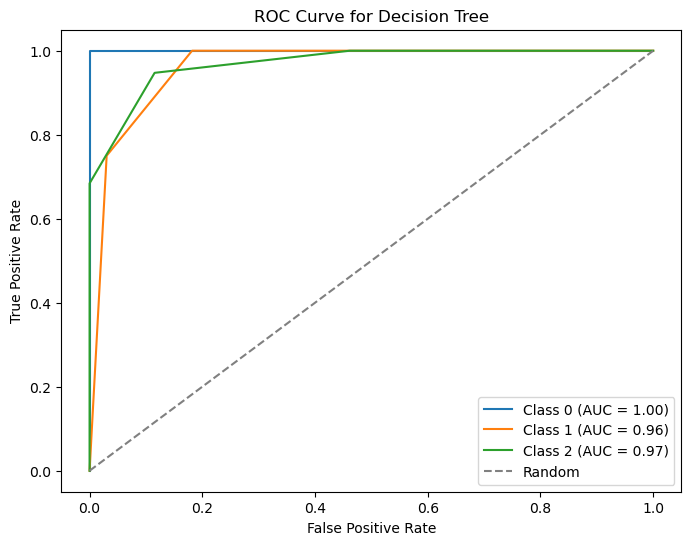

Average AUC-ROC: 0.98


In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Вероятности для модели дерева решений
tree_probs = tree_grid.predict_proba(X_valid)

# Рассчет ROC-кривых и AUC-ROC для каждого класса
n_classes = len(tree_grid.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_valid == i, tree_probs[:, i])
    roc_auc[i] = roc_auc_score((Y_valid == i).astype(int), tree_probs[:, i])

# Вычисление средней AUC-ROC
auc_tree = np.mean(list(roc_auc.values()))

# Построение ROC-кривых для каждого класса
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Добавление диагонали случайного классификатора (рандома)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Настройка внешнего вида графика
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

print(f"Average AUC-ROC: {auc_tree:.2f}")


### ROC для модели kNN:

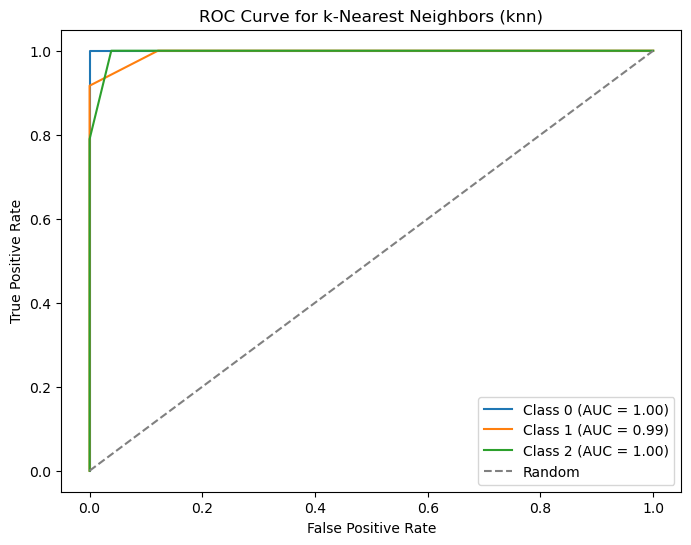

Average AUC-ROC: 1.00


In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Вероятности для модели k-ближайших соседей (knn)
knn_probs = knn_grid.predict_proba(X_valid)

# Рассчет ROC-кривых и AUC-ROC для каждого класса
n_classes = len(knn_grid.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_valid == i, knn_probs[:, i])
    roc_auc[i] = roc_auc_score((Y_valid == i).astype(int), knn_probs[:, i])

# Вычисление средней AUC-ROC
auc_knn = np.mean(list(roc_auc.values()))

# Построение ROC-кривых для каждого класса
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Добавление диагонали случайного классификатора (рандома)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Настройка внешнего вида графика
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for k-Nearest Neighbors (knn)')
plt.legend()
plt.show()

print(f"Average AUC-ROC: {auc_knn:.2f}")


AUC-ROC (Area Under the Receiver Operating Characteristic Curve) представляет собой меру качества бинарной классификации на основе анализа ROC-кривой. AUC-ROC колеблется от 0 до 1, где 1 означает идеальное качество классификации, а 0.5 - случайное угадывание.

В нашем случае результаты AUC-ROC для двух моделей (решающего дерева и k-ближайших соседей) высокие, что говорит о хорошем качестве моделей. Однако, результат AUC-ROC для k-ближайших соседей равен 1.00, что означает, что модель абсолютно идеально различает классы на валидационных данных.

Сравнение результатов:

Решающее дерево: Average AUC-ROC равен 0.98.
k-ближайших соседей (knn): Average AUC-ROC равен 1.00.
Эти значения указывают на отличное качество обеих моделей. Вероятно, k-ближайших соседей показывает немного лучшие результаты на основе AUC-ROC. 

## Вывод:

В рамках проведенной лабораторной работы были рассмотрены две модели машинного обучения: решающее дерево и метод k-ближайших соседей (KNN). Ниже представлен краткий вывод на основе полученных результатов:

### **Точность (Precision):**

* Решающее дерево: 0.9111
* KNN: 0.9333
Обе модели обладают высокой точностью, превышая 0.9, что указывает на способность моделей минимизировать количество ложноположительных предсказаний.

### **Полнота (Recall):**

* Решающее дерево: 0.8667
* KNN: 0.9111
Обе модели также демонстрируют высокую полноту, превышая 0.85. Это говорит о способности моделей успешно выявлять большую часть истинноположительных случаев.

### **F1-мера:**

* Решающее дерево: 0.8675
* KNN: 0.9122
F1-мера, объединяющая точность и полноту, также остается на высоком уровне для обеих моделей.

### **AUC-ROC:**

* Решающее дерево: 0.98
* KNN: 1.00
Значения AUC-ROC для обеих моделей свидетельствуют о высоком качестве их способности различать классы. Особенно впечатляющий результат получен для KNN с AUC-ROC, равным 1.00, что указывает на абсолютную дискриминирующую способность модели.

### **На основе представленных метрик, таких как точность, полнота, F1-мера и AUC-ROC, модель k-ближайших соседей (KNN) показала лучшие результаты по сравнению с решающим деревом на валидационных данных.**

1703